

1.   Date: (DD/MM/YYYY) Day, Month(1/6/2012)
2.   Temp: temperature noon in Celsius degree
3.   RH:   Relative Humidity
4.   Ws:   Wind speed in km/h: 6 to 29
5.   Rain
6.   Fine Fuel Mositure Code (FFMC) index from the FWI system. 28.6 to 92.5
7.   Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8.   Drought Code (DC) index from the FWI system:7 to 220.4
9.   Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10.  Buildup Index(BUI) index from the FWI system: 1.1 to 68
11.  Fire Weather Index (FWI) index: 0 to 31.1
12.  Classes: two classes, namely Fire and Not Fire.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Regression/Algerian_forest_fire_cleaned.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['day', 'month','year'], axis=1, inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [8]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [9]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [10]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_test.shape

((194, 11), (49, 11))

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


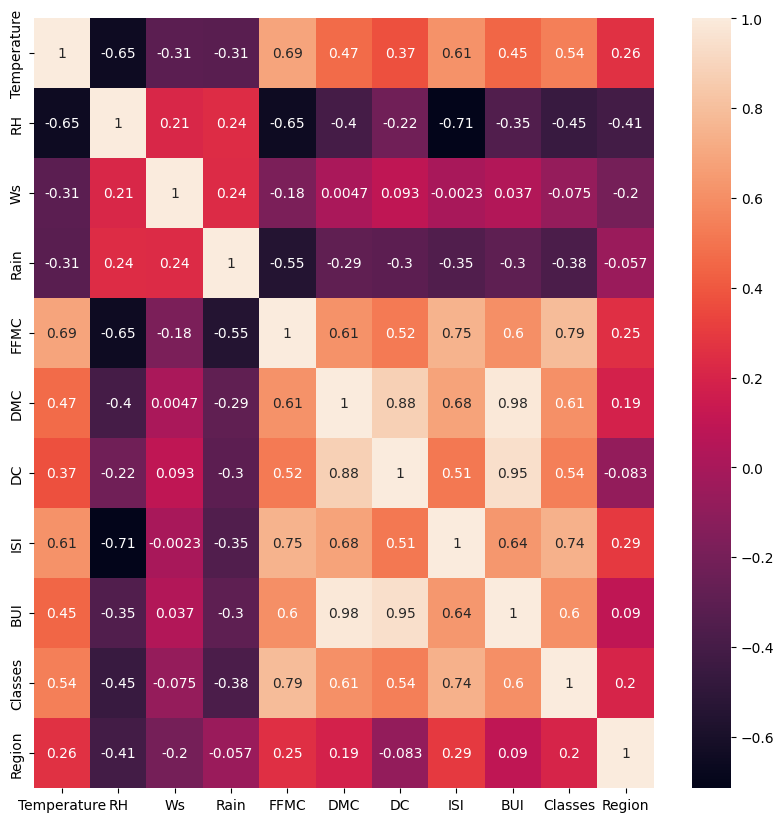

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [17]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [18]:
corr_features = correlation(X_train, 0.85)

In [19]:
corr_features

{'BUI', 'DC'}

In [20]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

Feature Scaling Or Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [22]:
X_train_sc

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.79648833,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  1.88757476,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.19488798,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.0972885 ,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.56868169,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.88904223,
        -1.14434427, -1.01036297]])

## Box Plots To Understand Effect of Standard Scaler

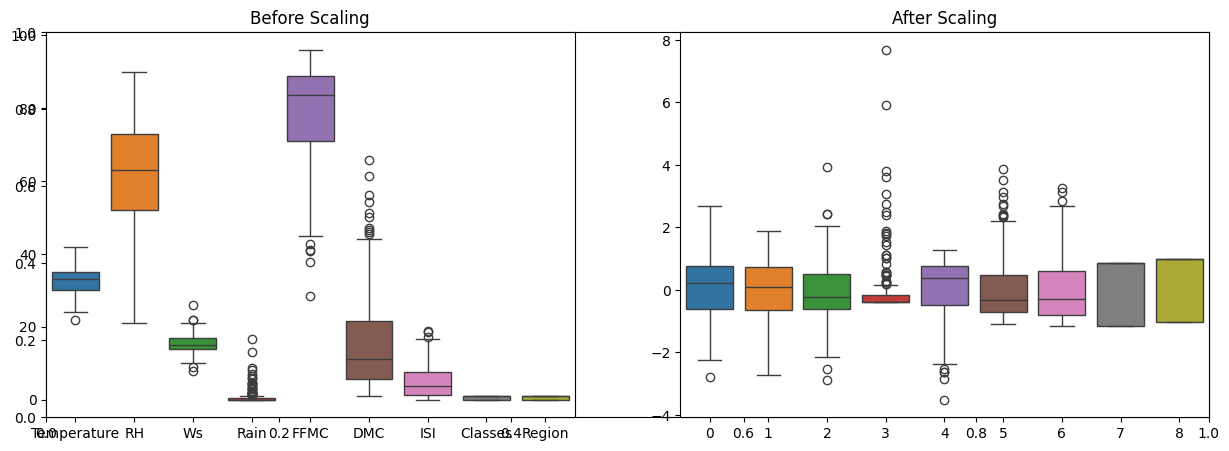

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title('After Scaling')
plt.show()

## **Linear Regression**

Mean Absolute Error 0.5049978694165687
Mean Squared Error 0.5882990110708693
Root Mean Squared Error 0.7670065260940544
R2 Score 0.9805895859259882


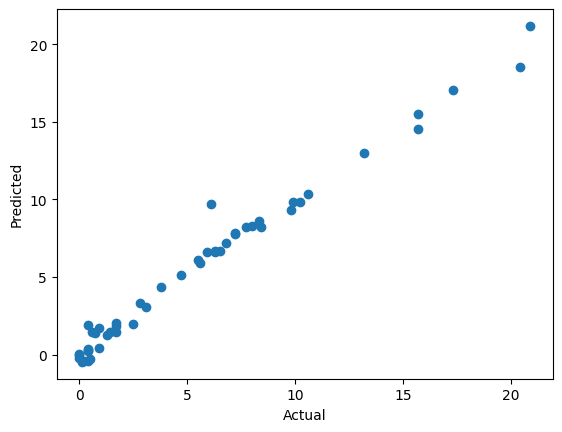

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
y_pred =lr.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 Score", r2)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Lasso Regression
Definition: (Least Absolute Shrinkage and Selection Operator) is a regularization technique in machine learning that performs feature selection and prevents overfitting by adding a penalty (L1 norm) to the cost function, shrinking less important coefficients to zero





Mean Absolute Error 1.0093958923873407
Mean Squared Error 1.726042325023142
Root Mean Squared Error 1.31378930008702
R2 Score 0.9430507350726562


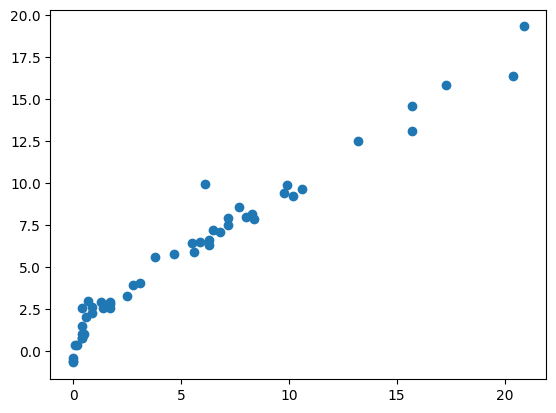

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score
las = Lasso()
las.fit(X_train_sc, y_train)
y_pred =las.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 Score", r2)
plt.scatter(y_test, y_pred)

# Cross-validation (CV):
  a powerful model validation technique in machine learning, used to assess how well a model generalizes to new data by repeatedly splitting the dataset into training and testing subsets, training the model on the training parts, and evaluating it on the hold-out test parts, averaging the results for a robust performance estimate, which prevents overfitting and helps select the best model.

  ## Key Benefits

> Reduces Overfitting: Ensures the model performs well on unseen data, not just the training data.

> Uses All Data: Every data point serves as a test point exactly once in k-fold CV, maximizing data usage, especially with smaller datasets.


> More Reliable Metric: Provides a robust estimate of model performance by averaging multiple evaluations.


  ## Common Types


    *   K-Fold: The standard approach, splitting data into 'k' folds.
    *   Stratified K-Fold: Ensures each fold has a similar class distribution to the original dataset, ideal for classification.
    *   Leave-One-Out Cross-Validation (LOOCV): A special case where k equals the number of data points, training on all but one point and testing on that single point, repeated for every point.











In [27]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_sc, y_train)

LassoCV(cv=5)

Mean Absolute Error 0.5556715031617872
Mean Squared Error 0.6568370026125329
Root Mean Squared Error 0.8104548121965425
R2 Score 0.978328234520343


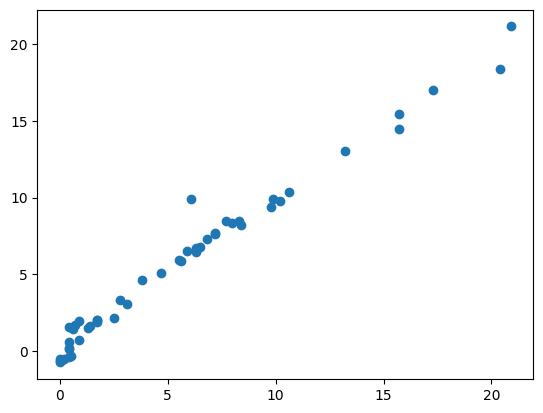

In [33]:
y_pred = lassocv.predict(X_test_sc)
plt.scatter(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 Score", r2)

In [44]:
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

# Ridge Regression

Mean Absolute Error 0.5192048325844797
Mean Squared Error 0.6029616070548641
Root Mean Squared Error 0.7765060251246375
R2 Score 0.9801058063273599


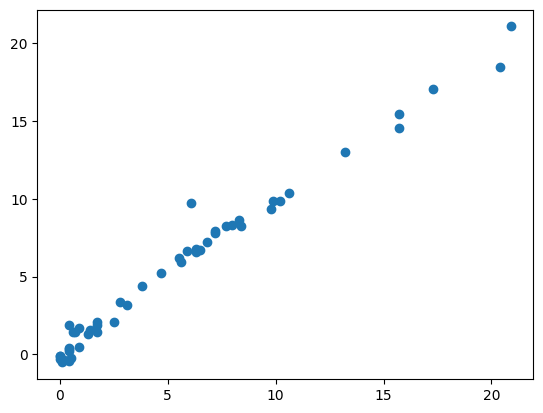

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import median_absolute_error, mean_squared_error, r2_score
rid = Ridge()
rid.fit(X_train_sc, y_train)
y_pred1= rid.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred1)
mse=mean_squared_error(y_test, y_pred1)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred1)
print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("R2 Score", r2)
plt.scatter(y_test, y_pred1)

In [40]:
from sklearn.linear_model import RidgeCV
ridcv = RidgeCV(cv=5)
ridcv.fit(X_train_sc, y_train)

RidgeCV(cv=5)

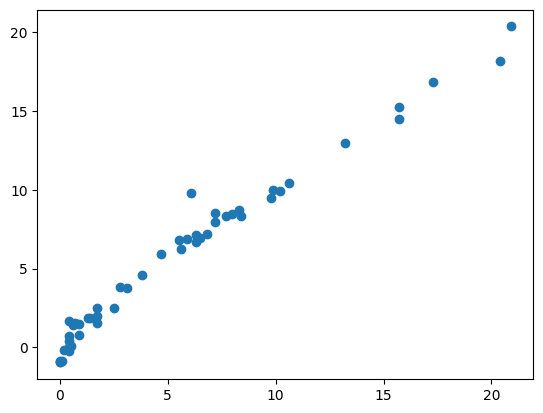

In [41]:
y_pred1 = ridcv.predict(X_test_sc)
plt.scatter(y_test, y_pred1)
mae=mean_absolute_error(y_test, y_pred1)
mse=mean_squared_error(y_test, y_pred1)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred1)

In [43]:
ridcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

#### Pickling the machine learning models, preprocessing model standardscaler

In [45]:
sc

StandardScaler()

In [46]:
rid

Ridge()

In [47]:
import pickle
pickle.dump(sc, open('sc.pkl', 'wb'))
pickle.dump(rid, open('rid.pkl', 'wb'))